In [9]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
    
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import confusion_matrix

from sklearn import tree
import graphviz
from graphviz import Source
 
from sklearn.tree import export_graphviz

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
hiv = pd.read_csv("DOHMH_HIV_AIDS_Annual_Report.csv")

In [11]:
hiv["Year"] = pd.to_datetime(hiv["Year"])
hiv.describe()

,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
count,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000
mean,26.494588,119.501499,5.095087,25399.316403,33.299917,122.763697,317.515254,2655.912073,49.447460,10.341632,20003.185079,20005.061865
std,130.995148,2883.974280,24.492574,43470.652710,1292.863435,3159.088051,5616.414102,15846.355601,1826.287128,16.379212,40001.239238,40000.301359
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,67.000000,0.000000,0.000000,0.200000,71.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,18.500000,1.000000,83.000000,2.000000,10.400000,0.600000,79.000000,1.000000,6.000000,3.000000,5.500000
75%,13.000000,49.400000,3.000000,99999.000000,8.000000,30.600000,1.500000,87.000000,8.000000,14.100000,14.400000,22.100000
max,3379.000000,99999.000000,640.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,263.200000,99999.000000,99999.000000


In [26]:
X = hiv.drop(columns = ["% linked to care within 3 months","Year","Borough","UHF","Gender","Age","Race"])
X.head()

,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
0,3379,48.3,640,2366,33.8,1.1,71,2040,13.6,5.8,7.8
1,2595,79.1,480,1712,52.2,1.7,72,1423,13.4,5.7,7.7
2,733,21.1,153,622,17.6,0.6,68,605,14.0,6.0,8.0
3,51,99999.0,7,32,99999.0,99999.0,55,12,11.1,5.7,5.4
4,47,13.6,4,22,6.4,0.1,57,1,1.4,1.4,0.0


In [27]:
y = hiv["% linked to care within 3 months"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [37]:
reg = tree.DecisionTreeRegressor(max_depth = 2)
reg = reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

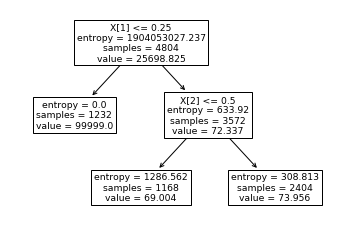

In [38]:
tree.plot_tree(reg);

In [42]:
((y_test - y_pred)**2).mean()

488.8400910422261

In [35]:
knn_mses = []
for k in range(1,21):
    knn_scaled = KNeighborsRegressor(n_neighbors = k)
    knn_scaled.fit(X_train_scaled, y_train)
    y_pred_scaled = knn_scaled.predict(X_test_scaled)
    mse = ((y_test - y_pred_scaled)**2).mean()
    knn_mses.append(mse)

Text(0, 0.5, 'Mean Squared Error')

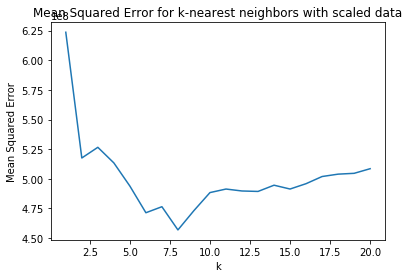

In [36]:
plt.plot(range(1,21),knn_mses)
plt.title("Mean Squared Error for k-nearest neighbors with scaled data")
plt.xlabel("k")
plt.ylabel("Mean Squared Error")